<a href="https://colab.research.google.com/github/shouryadipta321999/Random_Forest_Classifier/blob/main/Random_Forest_Classifier_(_Bank_Data_set_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Random Forest Algorithm ( Bank Data Set )**

In [ ]:
from google.colab import files   # For importing files from the Database of the PC Library
uploaded = files.upload()        # Uploading the File in the Goolge Collab
import pandas as pd              # For Data Manipulation
import numpy as np               # For Data Pre Processing
import matplotlib.pyplot as plt  # Fo Data Visualization
import warnings                  # For the removal of the Warnings
warnings.filterwarnings('ignore')# For ignoring the warnings


Saving Bank.csv to Bank (3).csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['Bank.csv']))
df.head(20)


,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no
5,35,management,single,tertiary,no,747,no,no,2,3,no
6,36,self-employed,married,tertiary,no,307,yes,no,1,2,no
7,39,technician,married,secondary,no,147,yes,no,2,0,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,2,0,no
9,43,services,married,primary,no,-88,yes,yes,1,2,no


In [ ]:
df.tail(10)

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
4511,46,blue-collar,married,secondary,no,668,yes,no,2,0,yes
4512,40,blue-collar,married,secondary,no,1100,yes,no,2,0,no
4513,49,blue-collar,married,secondary,no,322,no,no,2,0,no
4514,38,blue-collar,married,secondary,no,1205,yes,no,4,1,no
4515,32,services,single,secondary,no,473,yes,no,5,0,no
4516,33,services,married,secondary,no,-333,yes,no,5,0,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,1,0,no
4518,57,technician,married,secondary,no,295,no,no,11,0,no
4519,28,blue-collar,married,secondary,no,1137,no,no,4,3,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,2,7,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                4521 non-null   int64 
 1   job                4521 non-null   object
 2   marital            4521 non-null   object
 3   education          4521 non-null   object
 4   default            4521 non-null   object
 5   balance            4521 non-null   int64 
 6   housing-loan       4521 non-null   object
 7   personal-loan      4521 non-null   object
 8   current-campaign   4521 non-null   int64 
 9   previous-campaign  4521 non-null   int64 
 10  subscribed         4521 non-null   object
dtypes: int64(4), object(7)
memory usage: 388.6+ KB


In [ ]:
from sklearn.model_selection import train_test_split   # For train, test and split data

In [ ]:
from sklearn import metrics                            # Importing the metrics sublibrary from the sklearn library

**Dealing with Imbalance Sheets**

In [ ]:
df.subscribed.value_counts()        

no     4000
yes     521
Name: subscribed, dtype: int64

In [ ]:
from sklearn.utils import resample                    # For importing resample sublibrary from the Scikit Learn Library

In [ ]:
bank_subscribed_no = df[df.subscribed == 'no']
bank_subscribed_yes = df[df.subscribed == 'yes']
df_minority_upsampled = resample(bank_subscribed_yes, replace=True,n_samples=2000)
new_bank_df = pd.concat([bank_subscribed_no, df_minority_upsampled]) 
new_bank_df. subscribed.value_counts()

no     4000
yes    2000
Name: subscribed, dtype: int64

In [ ]:
new_bank_df.info() 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 823
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                6000 non-null   int64 
 1   job                6000 non-null   object
 2   marital            6000 non-null   object
 3   education          6000 non-null   object
 4   default            6000 non-null   object
 5   balance            6000 non-null   int64 
 6   housing-loan       6000 non-null   object
 7   personal-loan      6000 non-null   object
 8   current-campaign   6000 non-null   int64 
 9   previous-campaign  6000 non-null   int64 
 10  subscribed         6000 non-null   object
dtypes: int64(4), object(7)
memory usage: 562.5+ KB


In [ ]:
from sklearn.utils import shuffle   # For importing the Shuffle Sub-Library from  the Sklearn Library
new_bank_df = shuffle(new_bank_df)  


## **Assigning list of all column names in the Data Frame**

In [ ]:
X_features = list( new_bank_df.columns ) 
X_features.remove( 'subscribed' )
X_features

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing-loan',
 'personal-loan',
 'current-campaign',
 'previous-campaign']

In [ ]:
encoded_bank_df = pd.get_dummies( new_bank_df[X_features], drop_first = True ) 
X = encoded_bank_df 

### ** Encoding the subscribed column and assigning to y **



In [ ]:
Y = new_bank_df. subscribed.map( lambda x: int( x == 'yes') )                                 

In [ ]:
from sklearn.model_selection import train_test_split 
train_X, test_X, trainy, testy = train_test_split( X, Y, test_size = 0.3, random_state = 42)   # Here Test Size data is 30% and the Training Data is 70%



### **Building the Random Forest Model**

In [ ]:
  from sklearn.ensemble import RandomForestClassifier 
  radm_clf = RandomForestClassifier( max_depth=10, n_estimators=10)
  radm_clf.fit( train_X, trainy ) 


RandomForestClassifier(max_depth=10, n_estimators=10)

In [ ]:
pred_y = radm_clf.predict(test_X) 

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sn 
%matplotlib inline 


In [ ]:
from sklearn import metrics
def draw_cm( actual, predicted ): 
 cm = metrics.confusion_matrix( actual, predicted )
 sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Subscribed", "Not Subscribed"])
 plt.ylabel('True label') 
 plt.xlabel('Predicted label') 
 plt.show() 


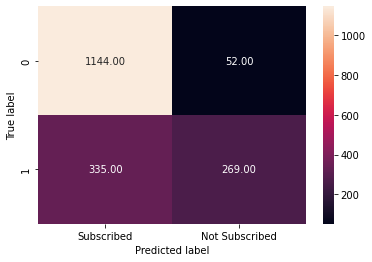

In [ ]:
cm = draw_cm( testy, pred_y )    # Confusion Matrix ( True Positive, True Negative, False Positive and False Negative )
cm 

In [ ]:
print( metrics.classification_report( testy, pred_y ) ) 


              precision    recall  f1-score   support

           0       0.77      0.96      0.86      1196
           1       0.84      0.45      0.58       604

    accuracy                           0.79      1800
   macro avg       0.81      0.70      0.72      1800
weighted avg       0.80      0.79      0.76      1800



## **Predicting the probability values for test cases** 

In [ ]:
predict_proba_df = pd.DataFrame( radm_clf.predict_proba( test_X ) )
predict_proba_df.head(10) 

,0,1
0,0.556863,0.443137
1,0.654480,0.345520
2,0.170575,0.829425
3,0.791555,0.208445
4,0.719736,0.280264
5,0.822809,0.177191
6,0.843343,0.156657
7,0.291843,0.708157
8,0.757050,0.242950
9,0.740794,0.259206


In [ ]:
# Initializing the DataFrame with actual class Lables 
test_results_df = pd. DataFrame({ 'actual': testy })
test_results_df = test_results_df.reset_index() 

# Assigning the probability values for class Label 1 test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2] 
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2] 

test_results_df.head(10) 

,index,actual,chd_1
0,657,0,0.443137
1,965,1,0.345520
2,2176,1,0.829425
3,178,0,0.208445
4,573,0,0.280264
5,4049,0,0.177191
6,1525,0,0.156657
7,3743,1,0.708157
8,628,0,0.242950
9,3733,1,0.259206


In [ ]:
# Passing actual class Labels and the predicted probability values to compute ROC AUC 

auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 ) 
round( float( auc_score ), 2) 


0.87

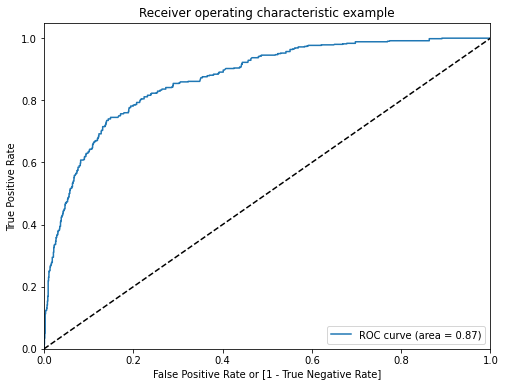

SyntaxError: ignored

In [ ]:
# The method takes the three following parameters
# model: the classification model
# test_X: X features of the test set
# testy: actual Labels of the test set
# Returns 
# - ROC Auc Score
# - FPR and TPRs for different threshold values 
def draw_roc_curve( model, test_X, test_y ): 
# Creating and initializing a results DataFrame with actual Labels
 test_results_df = pd. DataFrame( { 'actual': test_y })
 test_results_df = test_results_df.reset_index() 
# Predict the probabilities on the test set 
 predict_proba_df = pd.DataFrame( model.predict_proba( test_X ) )
# Selecting the probabilities that the test example belongs to class 1 
test_results_df['chd_1'] = predict_proba_df.iloc[:,1:2] 
# Invoke roc_curve() to return the fpr, tpr and threshold values. 
# Threshold values contain values from 0.0 to 1.0 
fpr, tpr, thresholds = metrics.roc_curve( test_results_df.actual, test_results_df.chd_1, drop_intermediate = False ) 
# Getting the roc auc score by invoking metrics.roc_auc_score method 
auc_score = metrics.roc_auc_score( test_results_df.actual, test_results_df.chd_1 )
# Setting the size of the plot
plt. figure(figsize=(8, 6))
# Plotting the actual for and tpr values
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ) 
# Plotting th diagnoal line from (0,1) 
plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
# Setting Labels and titles
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate') 
plt.title('Receiver operating characteristic example') 
plt.legend (loc="lower right") 
plt.show()
return auc_score, fpr, tpr, thresholds 

 

In [ ]:
# Importing GridSearchev 
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import GridSearchCV




In [ ]:
# Configuring parameters and values for searched 
tuned_parameters = [{ 'max_depth': [10, 15], 'n_estimators': [10,20], 'max_features': ['sqrt', 'auto']}]
# Initializing the RF classifier 
radm_clf = RandomForestClassifier()
# Configuring search with the tunable parameters 
clf = GridSearchCV(radm_clf, tuned_parameters, cv=5, scoring='roc_auc') 
# Fitting the training set 
clf.fit(train_X, trainy ) 


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 15],
                          'max_features': ['sqrt', 'auto'],
                          'n_estimators': [10, 20]}],
             scoring='roc_auc')

In [ ]:
 clf.best_score_ 
 

0.9272971517134062

In [ ]:
clf.best_params_ 


{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 20}

In [ ]:
# Initializing the Random Forest Mode with the optimal values
radm_clf = RandomForestClassifier( max_depth=15, n_estimators=20, max_features = 'auto')
# Fitting the model with the training set 
radm_clf.fit( train_X, trainy ) 


RandomForestClassifier(max_depth=15, n_estimators=20)

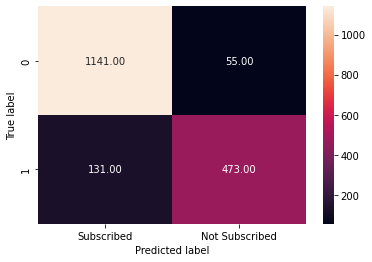

In [ ]:
pred_y = radm_clf.predict( test_X )
draw_cm( testy, pred_y )

In [ ]:
print( metrics.classification_report( testy, pred_y )) 


              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1196
           1       0.90      0.78      0.84       604

    accuracy                           0.90      1800
   macro avg       0.90      0.87      0.88      1800
weighted avg       0.90      0.90      0.89      1800



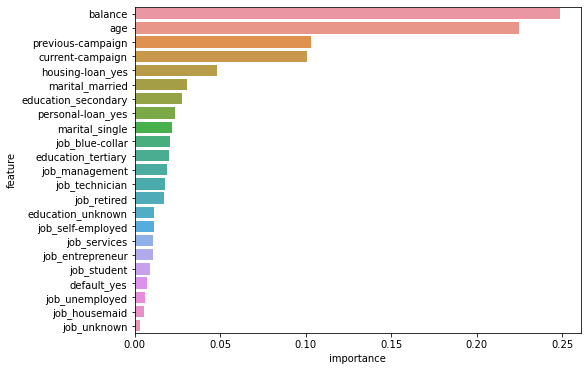

In [ ]:
import numpy as np 
# Create a dataframe to store the featues and their corresponding importances
feature_rank = pd.DataFrame( { 'feature': train_X.columns, 'importance': radm_clf.feature_importances_ }) 
# Sorting the features based on their importances with most important feature at top. 
feature_rank = feature_rank.sort_values('importance', ascending = False) 
plt.figure(figsize=(8, 6)) 
# Plot the values 
sn.barplot( y = 'feature', x = 'importance', data = feature_rank );   # For Data Visualization by using the Seaborn Library


In [ ]:
feature_rank['cumsum'] = feature_rank.importance.cumsum() * 100 
feature_rank.head(10) 

,feature,importance,cumsum
1,balance,0.248574,24.857410
0,age,0.225047,47.362107
3,previous-campaign,0.103013,57.663383
2,current-campaign,0.100624,67.725762
21,housing-loan_yes,0.048148,72.540540
15,marital_married,0.030527,75.593194
17,education_secondary,0.027676,78.360766
22,personal-loan_yes,0.023815,80.742310
16,marital_single,0.022124,82.954736
4,job_blue-collar,0.020850,85.039718


## **Thus my Python Programming on the Random Forest Algorithm comes to an end.**